In [104]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score,KFold
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import shapiro, f_oneway
from statsmodels.stats.multicomp import MultiComparison

In [105]:
with open('x_credit.plk','rb') as f:
    x_credit_train,y_credit_train,x_credit_test,y_credit_test = pickle.load(f)

In [106]:
x_credit_test.shape, y_credit_test.shape

((500, 3), (500,))

In [107]:
x_credit_train.shape, y_credit_train.shape

((1500, 3), (1500,))

In [108]:
x_credit = np.concatenate((x_credit_test,x_credit_train),axis=0)
x_credit.shape

(2000, 3)

In [109]:
y_credit = np.concatenate((y_credit_test,y_credit_train), axis=0)
y_credit.shape

(2000,)

In [110]:
params_tree = {'criterion':['gini','entropy'],'splitter':['best','random'],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_tree)
grid_search.fit(x_credit,y_credit)
best_params =grid_search.best_params_
best_result = grid_search.best_score_
print(best_params)
print(best_result)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.984


In [111]:
params_forest = {'criterion':['gini','entropy'],'n_estimators':[10,40,100,150],'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}
grid_search = GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_forest)
grid_search.fit(x_credit,y_credit)
best_params =grid_search.best_params_
best_result = grid_search.best_score_
print(best_params)
print(best_result)

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.986


In [112]:
params_knn = {'n_neighbors':[3,5,10,20],'p':[1,2]}
grid_search = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_knn)
grid_search.fit(x_credit,y_credit)
best_params =grid_search.best_params_
best_result = grid_search.best_score_
print(best_params)
print(best_result)

{'n_neighbors': 5, 'p': 1}
0.9804999999999999


In [113]:
params_logistic_regression = {'tol':[0.0001,0.00001,0.000001],'C':[1.0,1.5,2.0],'solver':['lbfgs','sag','saga']}
grid_search = GridSearchCV(estimator=LogisticRegression(),param_grid=params_logistic_regression)
grid_search.fit(x_credit,y_credit)
best_params =grid_search.best_params_
best_result = grid_search.best_score_
print(best_params)
print(best_result)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}
0.9475


In [114]:
params_svm = {'tol':[0.0001,0.00001,0.000001],'C':[1,1.5,2],'kernel':['rbf','linear','poly','sigmoid']}
grid_search = GridSearchCV(estimator=SVC(),param_grid=params_svm)
grid_search.fit(x_credit,y_credit)
best_params =grid_search.best_params_
best_result = grid_search.best_score_
print(best_params)
print(best_result)

{'C': 2, 'kernel': 'rbf', 'tol': 0.0001}
0.984


In [115]:
params_neural_network = {'activation':['relu','logistic','tahn'],'solver':['adam','sgd'],'batch_size':[10,56]}
grid_search = GridSearchCV(estimator=MLPClassifier(),param_grid=params_neural_network)
grid_search.fit(x_credit,y_credit)
best_params =grid_search.best_params_
best_result = grid_search.best_score_
print(best_params)
print(best_result)

c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: Convergence

{'activation': 'relu', 'batch_size': 56, 'solver': 'adam'}
0.9964999999999999


c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


CROSS VALIDATION

In [116]:
results_tree =[]

for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True,random_state=i)
    tree = DecisionTreeClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,splitter='best')
    score = cross_val_score(tree,x_credit,y_credit,cv=kfold)
    #print(score)
    #print(score.mean())
    results_tree.append(score.mean())

print(results_tree)


[0.9884999999999999, 0.9884999999999999, 0.9864999999999998, 0.986, 0.9874999999999998, 0.9889999999999999, 0.9864999999999998, 0.9899999999999999, 0.9880000000000001, 0.9884999999999999, 0.9869999999999999, 0.985, 0.9884999999999999, 0.9899999999999999, 0.9864999999999998, 0.9924999999999999, 0.9879999999999999, 0.9884999999999999, 0.984, 0.9875, 0.9879999999999999, 0.9875, 0.9875, 0.986, 0.9894999999999998, 0.9890000000000001, 0.9869999999999999, 0.9834999999999999, 0.986, 0.9879999999999999]


In [117]:
result_random_forest =[]
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True,random_state=i)
    ramdon_forest = RandomForestClassifier(criterion='entropy',min_samples_leaf=1,min_samples_split=5,n_estimators=10)
    score = cross_val_score(ramdon_forest,x_credit,y_credit,cv=kfold)
    #print(score)
    #print(score.mean())
    result_random_forest.append(score.mean())

print(result_random_forest)

[0.986, 0.9829999999999999, 0.9844999999999999, 0.982, 0.9834999999999999, 0.984, 0.9804999999999999, 0.9844999999999999, 0.9884999999999999, 0.9865, 0.985, 0.984, 0.986, 0.9835, 0.9834999999999999, 0.9829999999999999, 0.9829999999999999, 0.9845, 0.985, 0.9824999999999999, 0.9855, 0.985, 0.9875, 0.9804999999999999, 0.986, 0.9850000000000001, 0.9804999999999998, 0.9809999999999999, 0.9844999999999999, 0.983]


In [118]:
results_knn=[]
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True,random_state=i)
    knn = KNeighborsClassifier(n_neighbors=5,p=1)
    score = cross_val_score(knn,x_credit,y_credit,cv=kfold)
    #print(score)
    #print(score.mean())
    results_knn.append(score.mean())

print(results_knn)

[0.9799999999999999, 0.9809999999999999, 0.9795, 0.9814999999999999, 0.9764999999999999, 0.9819999999999999, 0.9799999999999999, 0.9795, 0.9789999999999999, 0.9805000000000001, 0.9789999999999999, 0.9799999999999999, 0.9814999999999999, 0.9795, 0.9844999999999999, 0.9799999999999999, 0.9800000000000001, 0.9789999999999999, 0.9814999999999999, 0.9795, 0.9800000000000001, 0.9799999999999999, 0.9795, 0.9799999999999999, 0.9810000000000001, 0.9795, 0.977, 0.9800000000000001, 0.982, 0.9809999999999999]


In [119]:
results_logistic_regression = []
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True,random_state=i)
    logistic_regression = LogisticRegression(C=1,solver='lbfgs',tol=0.0001)
    score = cross_val_score(logistic_regression,x_credit,y_credit,cv=kfold)
    #print(score)
    #print(score.mean())
    results_logistic_regression.append(score.mean())

print(results_logistic_regression)

[0.9470000000000001, 0.9480000000000001, 0.9465000000000001, 0.9465000000000001, 0.9465, 0.9465, 0.9469999999999998, 0.9465, 0.9470000000000001, 0.9484999999999999, 0.9475, 0.9470000000000001, 0.9465, 0.9469999999999998, 0.9464999999999998, 0.9475, 0.946, 0.9480000000000001, 0.9469999999999998, 0.9470000000000001, 0.9465, 0.9465, 0.9460000000000001, 0.946, 0.9460000000000001, 0.9480000000000001, 0.9475, 0.9480000000000001, 0.9465, 0.9484999999999999]


In [120]:
results_svm=[]
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True,random_state=i)
    svm = SVC(C= 2, kernel= 'rbf', tol= 0.0001)
    score = cross_val_score(svm,x_credit,y_credit,cv=kfold)
    #print(score)
    #print(score.mean())
    results_svm.append(score.mean())

print(results_svm)


[0.984, 0.9835, 0.9844999999999999, 0.9855, 0.9854999999999998, 0.9845, 0.986, 0.984, 0.9849999999999998, 0.9854999999999998, 0.9855, 0.984, 0.9865, 0.9855, 0.9864999999999998, 0.9845, 0.986, 0.9864999999999998, 0.9864999999999998, 0.985, 0.986, 0.9855, 0.984, 0.9855, 0.9855, 0.9860000000000001, 0.9864999999999998, 0.984, 0.986, 0.985]


In [121]:
results_neural_learning=[]
for i in range(30):
    kfold = KFold(n_splits=10, shuffle=True,random_state=i)
    neural_learning = MLPClassifier(activation='relu',batch_size=56,solver='adam')
    score = cross_val_score(neural_learning,x_credit,y_credit,cv=kfold)
    #print(score)
    #print(score.mean())
    results_neural_learning.append(score.mean())

print(results_svm)

c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: Convergence

[0.984, 0.9835, 0.9844999999999999, 0.9855, 0.9854999999999998, 0.9845, 0.986, 0.984, 0.9849999999999998, 0.9854999999999998, 0.9855, 0.984, 0.9865, 0.9855, 0.9864999999999998, 0.9845, 0.986, 0.9864999999999998, 0.9864999999999998, 0.985, 0.986, 0.9855, 0.984, 0.9855, 0.9855, 0.9860000000000001, 0.9864999999999998, 0.984, 0.986, 0.985]


c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [122]:
results = pd.DataFrame({'Tree':results_tree,'Random Forest':result_random_forest,'KNN':results_knn,'Logistic Regression':results_logistic_regression,'SVM':results_svm,'Neural Learning':results_neural_learning})
results 

,Tree,Random Forest,KNN,Logistic Regression,SVM,Neural Learning
0,0.9885,0.9860,0.9800,0.9470,0.9840,0.9970
1,0.9885,0.9830,0.9810,0.9480,0.9835,0.9970
2,0.9865,0.9845,0.9795,0.9465,0.9845,0.9965
3,0.9860,0.9820,0.9815,0.9465,0.9855,0.9970
4,0.9875,0.9835,0.9765,0.9465,0.9855,0.9975
5,0.9890,0.9840,0.9820,0.9465,0.9845,0.9975
6,0.9865,0.9805,0.9800,0.9470,0.9860,0.9970
7,0.9900,0.9845,0.9795,0.9465,0.9840,0.9975
8,0.9880,0.9885,0.9790,0.9470,0.9850,0.9970
9,0.9885,0.9865,0.9805,0.9485,0.9855,0.9975


In [123]:
results.describe()

,Tree,Random Forest,KNN,Logistic Regression,SVM,Neural Learning
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987617,0.984050,0.980133,0.946983,0.985283,0.996950
std,0.001823,0.001989,0.001479,0.000737,0.000907,0.000442
min,0.983500,0.980500,0.976500,0.946000,0.983500,0.996000
25%,0.986500,0.983000,0.979500,0.946500,0.984500,0.996625
50%,0.987750,0.984250,0.980000,0.947000,0.985500,0.997000
75%,0.988500,0.985000,0.981000,0.947500,0.986000,0.997000
max,0.992500,0.988500,0.984500,0.948500,0.986500,0.998000


In [124]:
results.var()

Tree                   3.322126e-06
Random Forest          3.954310e-06
KNN                    2.188506e-06
Logistic Regression    5.428161e-07
SVM                    8.221264e-07
Neural Learning        1.956897e-07
dtype: float64

In [125]:
(results.std()/results.mean())*100

Tree                   0.184552
Random Forest          0.202078
KNN                    0.150935
Logistic Regression    0.077801
SVM                    0.092025
Neural Learning        0.044372
dtype: float64

Normality test

In [126]:
alph = 0.05

In [127]:
shapiro(results_tree),shapiro(result_random_forest),shapiro(results_knn),shapiro(results_logistic_regression),shapiro(results_svm),shapiro(results_neural_learning)

(ShapiroResult(statistic=0.9685164287477738, pvalue=0.499421595994406),
 ShapiroResult(statistic=0.9706870289914726, pvalue=0.5581414732242982),
 ShapiroResult(statistic=0.9114597538648376, pvalue=0.016199696192986817),
 ShapiroResult(statistic=0.8994263474472676, pvalue=0.00813185329391616),
 ShapiroResult(statistic=0.9160797467988095, pvalue=0.02124754291514041),
 ShapiroResult(statistic=0.8815721064974976, pvalue=0.003064148092457262))

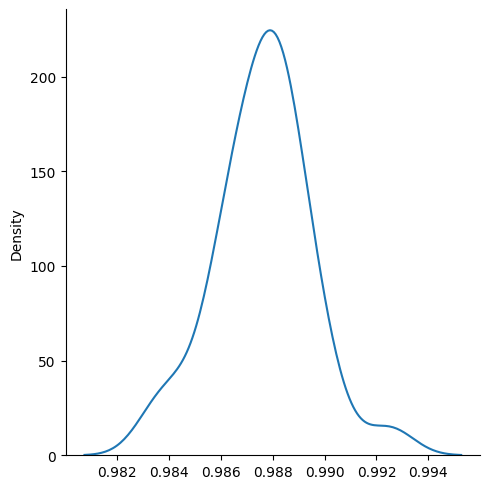

In [128]:
sns.displot(results_tree,kind='kde')

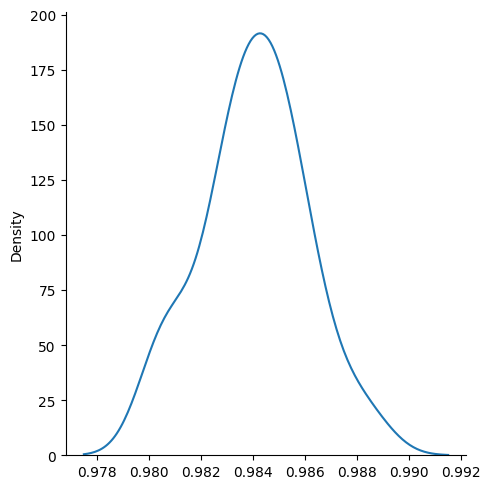

In [129]:
sns.displot(result_random_forest,kind='kde')

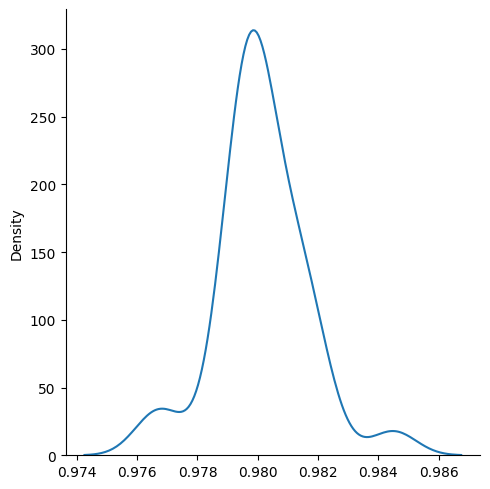

In [130]:
sns.displot(results_knn,kind='kde')

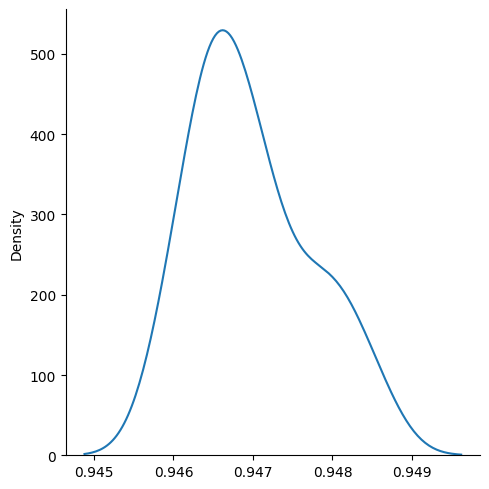

In [131]:
sns.displot(results_logistic_regression,kind='kde')

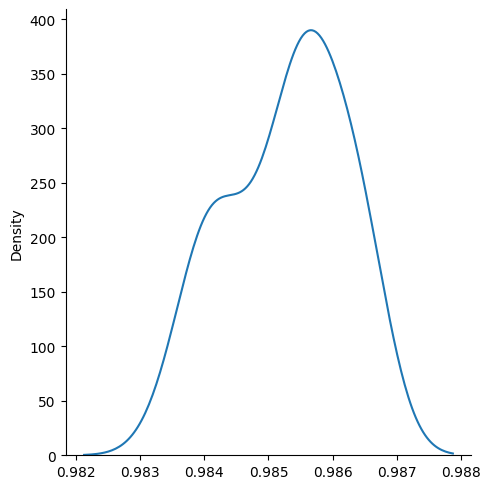

In [132]:
sns.displot(results_svm,kind='kde')

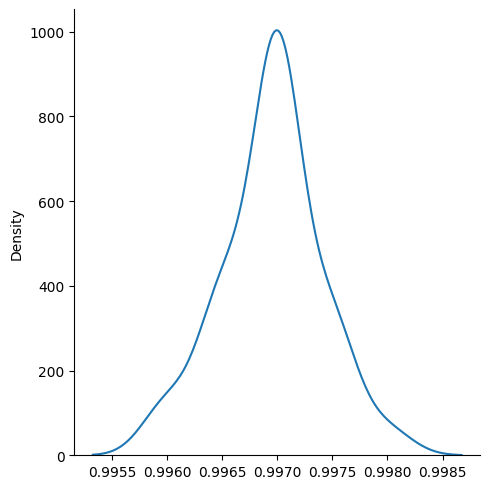

In [133]:
sns.displot(results_neural_learning,kind='kde')

In [134]:
s,p = f_oneway(results_tree,result_random_forest, results_knn, results_logistic_regression, results_svm, results_neural_learning)
p

1.333835366451221e-184

In [135]:
if p <= alph:
    print('H0 rejects, not null')
else:
    print('H0 it is tru')

H0 rejects, not null


In [136]:
results_algortims = pd.DataFrame({'accuracy':np.concatenate([results_tree,result_random_forest,results_knn,results_logistic_regression,results_svm,results_neural_learning]),'algoritms': ['tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree','tree',
                          'random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest','random_forest',
                          'knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn','knn',
                          'regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic','regression logistic',
                          'svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm','svm',
                          'neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning','neural learning']})
results_algortims

,accuracy,algoritms
0,0.9885,tree
1,0.9885,tree
2,0.9865,tree
3,0.9860,tree
4,0.9875,tree
...,...,...
175,0.9980,neural learning
176,0.9965,neural learning
177,0.9970,neural learning
178,0.9970,neural learning


In [137]:
comparions_results = MultiComparison(results_algortims['accuracy'],results_algortims['algoritms'])

In [138]:
test_stats = comparions_results.tukeyhsd()
print(test_stats)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
                knn     neural learning   0.0168    0.0  0.0158  0.0178   True
                knn       random_forest   0.0039    0.0  0.0029  0.0049   True
                knn regression logistic  -0.0331    0.0 -0.0342 -0.0321   True
                knn                 svm   0.0051    0.0  0.0041  0.0062   True
                knn                tree   0.0075    0.0  0.0065  0.0085   True
    neural learning       random_forest  -0.0129    0.0 -0.0139 -0.0119   True
    neural learning regression logistic    -0.05    0.0  -0.051  -0.049   True
    neural learning                 svm  -0.0117    0.0 -0.0127 -0.0107   True
    neural learning                tree  -0.0093    0.0 -0.0103 -0.0083   True
      random_forest regression logistic  -0.0371    

In [139]:
results.mean().sort_values(ascending=True)

Logistic Regression    0.946983
KNN                    0.980133
Random Forest          0.984050
SVM                    0.985283
Tree                   0.987617
Neural Learning        0.996950
dtype: float64

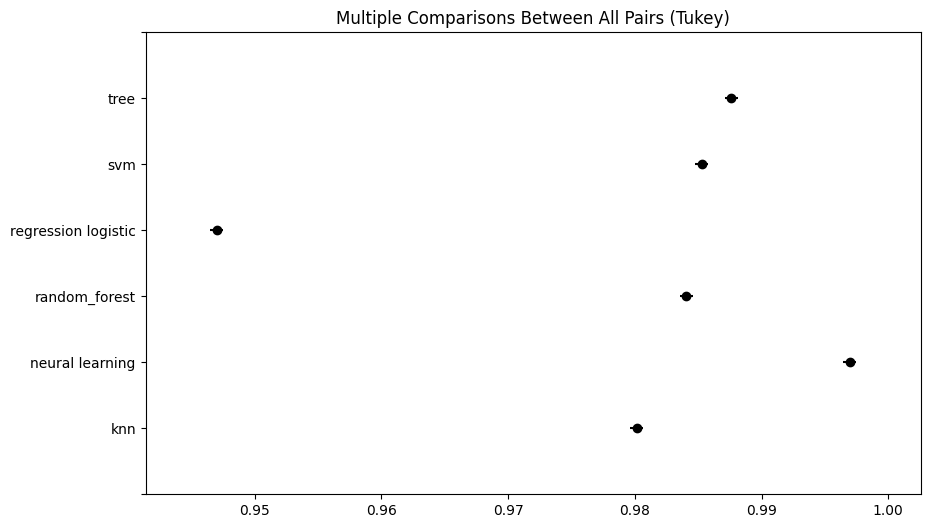

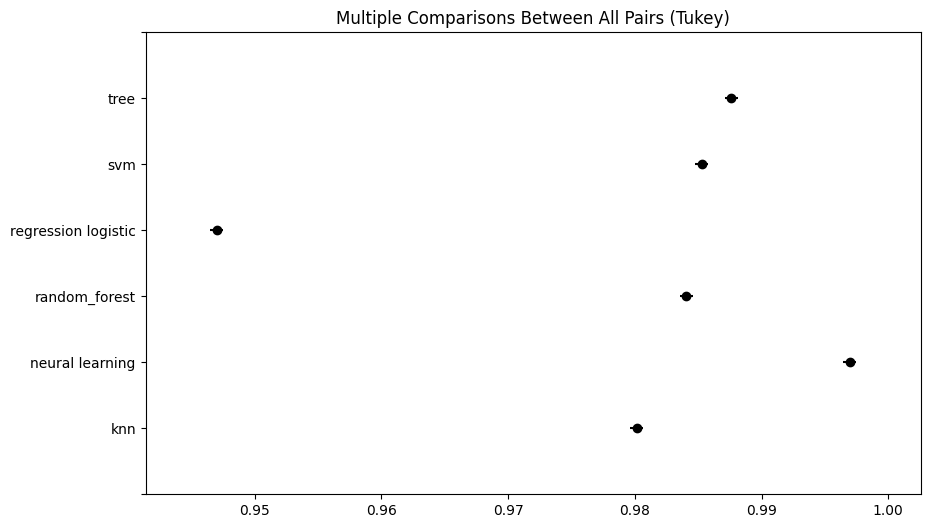

In [140]:
test_stats.plot_simultaneous()

Save a classifactor already been trainning


In [155]:
neural_learning_save = MLPClassifier(activation= 'relu', batch_size= 56, solver= 'adam')
tree_save = DecisionTreeClassifier(criterion= 'entropy', min_samples_leaf= 1, min_samples_split= 2, splitter= 'best')
ramdon_forest_save = RandomForestClassifier(criterion='gini', min_samples_leaf= 1, min_samples_split= 5, n_estimators = 40)
neural_learning_save.fit(x_credit,y_credit)
tree_save.fit(x_credit,y_credit)
ramdon_forest_save.fit(x_credit,y_credit)

c:\Users\mbern\OneDrive\machineLearningCourse\courseMachineLearning\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomForestClassifier(min_samples_split=5, n_estimators=40)

In [156]:
pickle.dump(neural_learning_save,open('neural_learning_save_done.sav','wb'))
pickle.dump(tree_save,open('tree_save_done.sav','wb'))
pickle.dump(ramdon_forest_save,open('ramdon_forest_save_done.sav','wb'))

Carring a classificator already trained

In [157]:
neural_carring=pickle.load(open('neural_learning_save_done.sav','rb'))
tree_carring=pickle.load(open('tree_save_done.sav','rb'))
ramdon_forest_carring = pickle.load(open('ramdon_forest_save_done.sav','rb'))

Combination of algoritms

In [166]:
new_register = x_credit[345]
new_register=new_register.reshape(1,-1)
new_register,new_register.shape

(array([[ 0.52855158,  1.45930306, -1.22017114]]), (1, 3))

In [167]:
result_1 = neural_carring.predict(new_register)
result_2= tree_carring.predict(new_register)
result_3= ramdon_forest_carring.predict(new_register)

In [168]:
result_1[0],result_2[0],result_3[0]

(0, 0, 0)

In [169]:
pay=0
dont_pay=0

In [170]:
if result_1[0]==1:
    dont_pay+=1
else:
    pay+=1

if result_2[0]==1:
    dont_pay+=1
else:
    pay+=1

if result_3[0]==1:
    dont_pay+=1
else:
    pay+=1

if pay>dont_pay:
    print('Clint will pay the loan')
elif pay==dont_pay:
    print("It's need more information")
else:
    
    print("Client won't pay the loan")

Clint will pay the loan


Rejection's Classifactors

In [171]:
new_register = x_credit[0]
new_register=new_register.reshape(1,-1)
new_register,new_register.shape

(array([[ 1.59301567, -1.35435933,  2.58262733]]), (1, 3))

In [172]:
probabilite_neural_network = neural_carring.predict_proba(new_register)
probabilite_neural_network

array([[1.68616454e-10, 1.00000000e+00]])

In [173]:
trust_neural_network = probabilite_neural_network.max()
trust_neural_network

0.9999999998313835

In [175]:
probabilite_tree = tree_carring.predict_proba(new_register)
probabilite_tree

array([[0., 1.]])

In [177]:
trust_tree = probabilite_tree.max()
trust_tree

1.0

In [178]:
probabilit_forest = ramdon_forest_carring.predict_proba(new_register)
probabilit_forest

array([[0.08875, 0.91125]])

In [179]:
trust_forest = probabilit_forest.max()
trust_forest

0.9112500000000001

In [181]:
pay=0
dont_pay=0
minimium_trust=0.95
alogirtms=0

if trust_neural_network > minimium_trust:
    alogirtms+=1
    if result_1[0]==1:
        dont_pay+=1
    else:
        pay+=1


if trust_tree > minimium_trust:
    alogirtms+=1
    if result_2[0]==1:
        dont_pay+=1
    else:
        pay+=1

if trust_forest> minimium_trust:
    alogirtms+=1
    if result_3[0]==1:
        dont_pay+=1
    else:
        pay+=1

if pay>dont_pay:
    print('Clint will pay the loan, basead on {} algoritms'.format(alogirtms))
elif pay==dont_pay:
    print("It's need more information,basead on {} algoritms".format(alogirtms))
else:
    
    print("Client won't pay the loan, basead on {} algoritms".format(alogirtms))

Clint will pay the loan, basead on 2 algoritms
